## TDA tests with gudhi

In [21]:
import pandas as pd
import numpy as np
import gudhi as gd  
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib widget

In [46]:
X_list = np.array(pd.read_csv("X_list_pig_big.csv"))
X_list.shape

(3965, 3)

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_list[:,0], X_list[:,1], X_list[:,2], s=2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

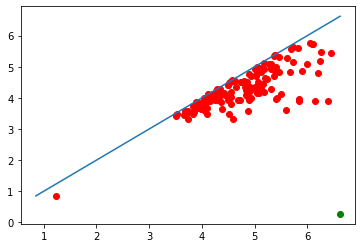

In [48]:
from gudhi.clustering.tomato import Tomato
%matplotlib inline

t = Tomato()
t.fit(X_list)
t.plot_diagram()
plt.show()

In [49]:
%matplotlib widget
t.n_clusters_=1
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_list[:,0], X_list[:,1], X_list[:,2], s=2, c=t.weights_)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [50]:
%matplotlib widget
sns.distplot(t.weights_)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [52]:
tresh = 3
X_filered = np.array([X_list[i] for i,w in enumerate(t.weights_) if w > tresh])

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_filered[:,0], X_filered[:,1], X_filered[:,2], s=2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [74]:
max_edge_length = 0.3
max_filtration_value = 1

skeleton = gd.RipsComplex(points = X_filered, max_edge_length = max_edge_length)
Rips_simplex_tree_sample = skeleton.create_simplex_tree(max_dimension = 3) 
rips_generator = Rips_simplex_tree_sample.get_filtration()

triangles = np.array([s[0] for s in rips_generator if len(s[0]) == 3 and s[1]<max_filtration_value])
len(triangles)

21644

In [75]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(X_filered[:,0], X_filered[:,1], X_filered[:,2], triangles=triangles)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### This is probably not the best way to infer 3D structure from a points cloud